In [60]:
from importlib import reload
import os
import numpy as np
import time
from tqdm import trange
from pulsestreamer import *
from nidaqmx import *

import analysis
reload(analysis)
from analysis import *

import measurement
reload(measurement)
from measurement import *

In [62]:
# loading the local Pulse Streamer and NIDAQmx
IPaddress = findPulseStreamers(search_serial='')[0][0]
pulser = PulseStreamer(IPaddress)

DAQ_device = nidaqmx.system.System.local().devices[0]
device_name = DAQ_device.terminals[0:1][0][1:5]
print(f'NIDAQmx device name : {device_name}')

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 169.254.8.2
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0
NIDAQmx device name : Dev1


In [72]:
specs_ports = {'laserNum' : 1, 'gateStart' : 5, 'source' : 7}

specs_delay = {'rising_delay' : 2,'gatelen' :  6, 'laserontime' :  31,'delay_pad' :  2,
               'delay_shift' :  2,'gatesourcedelay' : 2}
specs_t1 = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
            'delay_shift' : 45e3,'gatesourcedelay' : 5,'evolution_time' : 0.45e6}
specs_snr = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
             'delay_shift' : 150e3,'gatesourcedelay' : 5,'evolution_time' : 1.5e6}

specs_lifetime = {'rising_delay' : 2,'gatelen' : 2, 'laserontime' : 25,'laserofftime' : 50,
                  'delay_pad' : 2,'delay_shift' : 2,'gatesourcedelay' : 2}  
specs_t1_ir = {'rising_delay' : 20,'gatelen' : 2e3, 'laserontime' : 25e3,'delay_pad' : 20,
            'delay_shift' : 45e3,'gatesourcedelay' : 5,'evolution_time' : 0.45e6,'irontime' : 1e3,'irport' : 3}

In [74]:
total_specs = merge(specs_ports,specs_t1_ir)

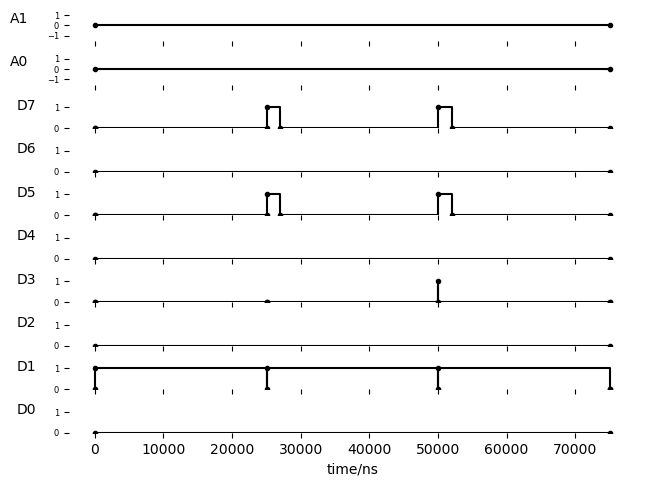

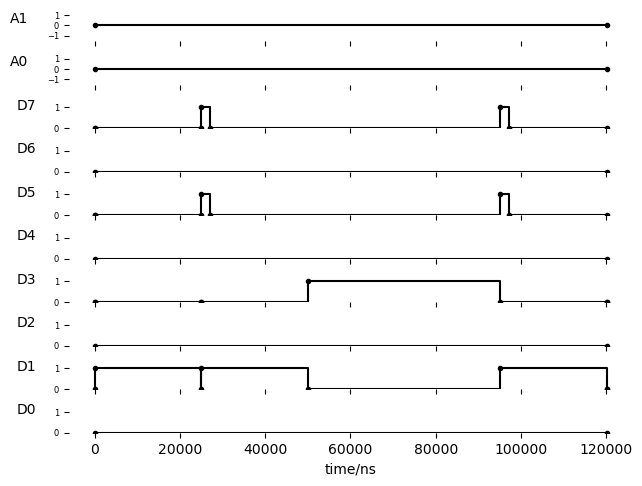

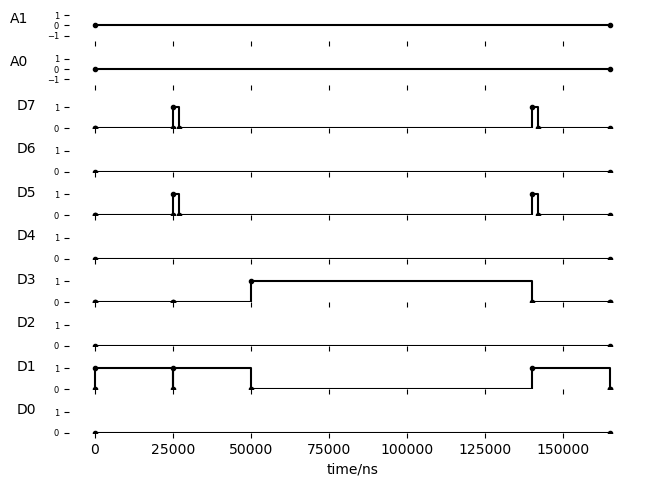

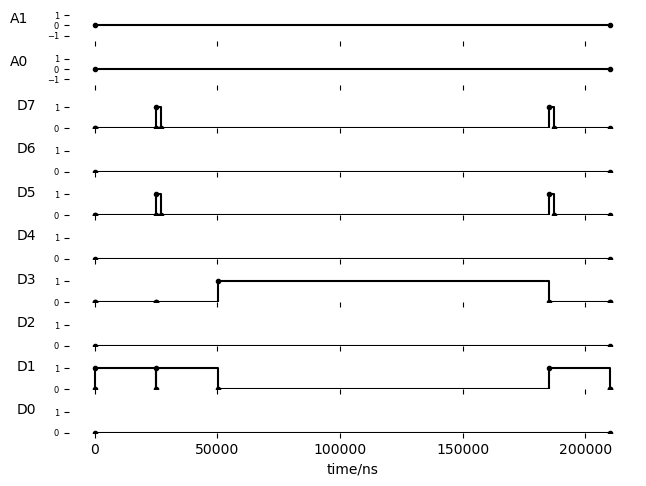

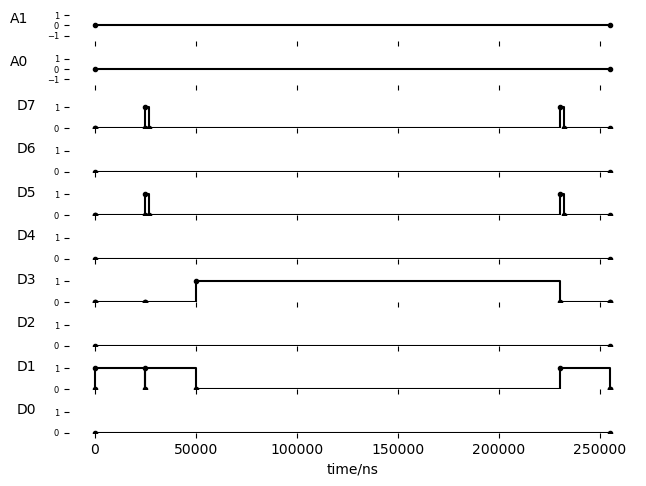

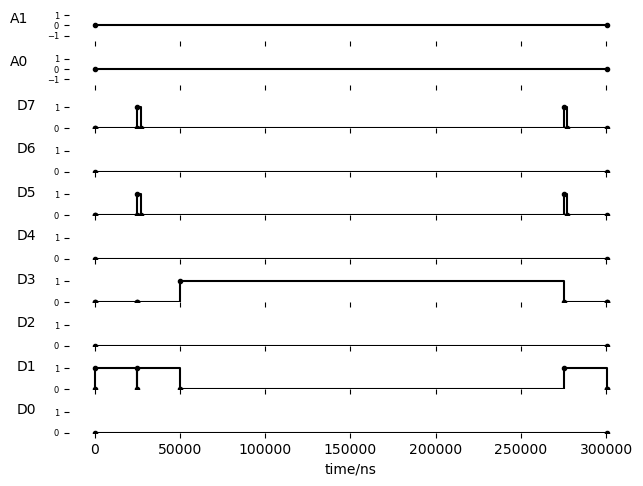

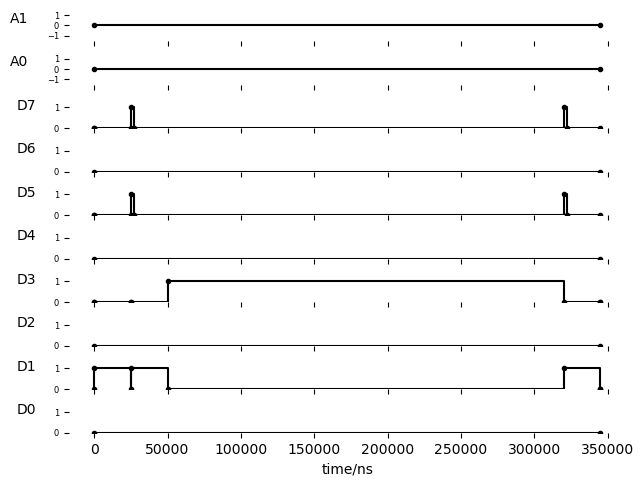

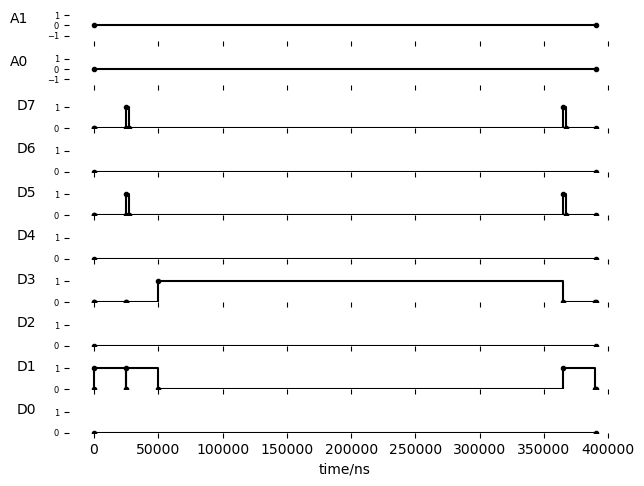

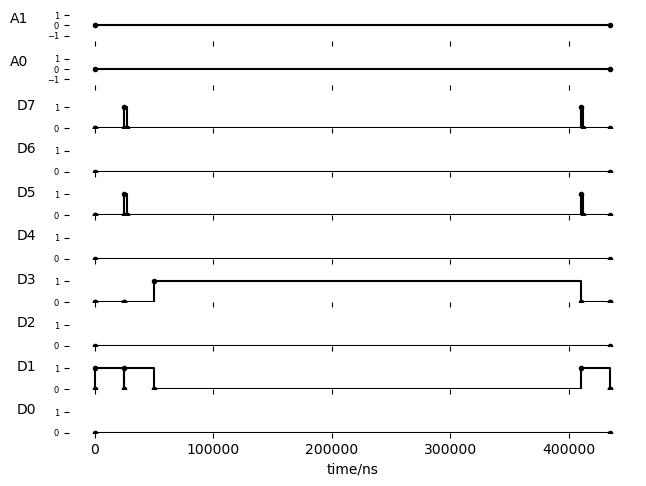

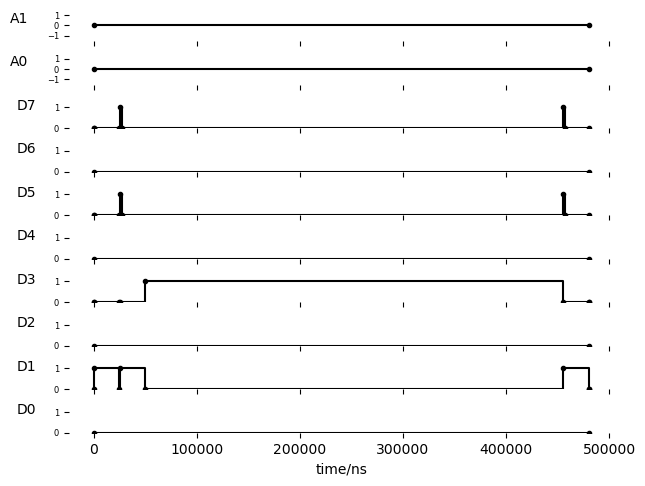

In [70]:
plot_sequence(pulser=pulser,exp_name='t1_ir',specifications=total_specs)

In [35]:
avg_data,time_axis = measure(pulser,DAQ_device,device_name,exp_name = 'lifetime',
                   samples=2000,averages=2,specifications=total_specs)

number of steps : 3
Pixel : 12000
creating sequence
starting DAQ
Preparing Ni Daq for the experiment
callback number in beginning: 0


  0%|          | 0/2 [00:00<?, ?it/s]

1


  0%|          | 0/2 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [819]:
dict_args = {'avg_data':avg_data,'time_axis':time_axis}

In [821]:
root_directory = os.getcwd()
print(f'root directory : {root_directory}')

root directory : C:\Users\Administrator\OneDrive\Desktop\T1_measurement\atanu_github\Instrument_Automation\Experimental_Applications


In [823]:
year = time.ctime()[-4:]
date = time.ctime()[4:10].replace(' ','_')
current_time = time.ctime()[-13:-8].replace(':','_')

folder_path = root_directory+f'/exp_data/{year}/{date}/microdiamonds/excited_state_lifetime/525nm/avgs_2/samples_2000/first_cluster'
file_name = f'[{current_time}]_gatelen_2000ns.npz'

total_path = npz_save(folder_path,file_name,**dict_args)

saving data_file '[13_47]_gatelen_2000ns.npz' is successful!



In [825]:
load_data = dict(np.load(total_path))

In [6]:
# def signal(data,samples):
#     data_shape = data.shape[0]
#     steps=int(data_shape/(2*samples))
#     # print(data_shape,steps)
    
#     # Separating Reference and Signal and averaging over Samples
#     reference_samples = np.mean(np.reshape(data[::2],(steps,samples)),axis=1)
#     signal_samples = np.mean(np.reshape(data[1::2],(steps,samples)),axis=1)
#     signal_photon = signal_samples/reference_samples
#     return signal_photon,reference_samples,signal_samples

# def data_to_time_signal(data,samples):
#     # print(data['avg_data'].shape,data['time_axis'].shape)
#     time = data['time_axis'][1:]
#     signal_photon,reference_samples,signal_samples = signal(data['avg_data'],samples)[1:]
#     return time,signal_photon,reference_samples,signal_samples

In [ ]:
samples=int(input('Enter the no of samples'))

time,signal_photon,reference_samples,signal_samples = data_to_time_signal(load_data,samples)

In [8]:
# steps=int(input('Enter the no of steps'))
# samples=int(input('Enter the no of samples'))

# # Separating Reference and Signal and averaging over Samples
# reference_samples = np.mean(np.reshape(load_data['avg_data'][::2],(steps,samples)),axis=1)
# signal_samples = np.mean(np.reshape(load_data['avg_data'][1::2],(steps,samples)),axis=1)
# signal_photon = signal_samples/reference_samples

In [ ]:
x=load_data['time_axis'][1:]
y=signal_photon[1:]

x_fit,y_fit,coefficient,error_bars = fit_func(x,y,fit_range=False,func='exp',guess_params=np.array([0.7,0.9,0.08e6]))

fig1 = simple_plot(x,y,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'{date}')
fig2 = simple_plot(x_fit,y_fit,show=False,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='lines',title=f'{date}')

add_figures([fig1,fig2],show=True,x_name = "Time (&mu;s)",y_name = "Counts (T<sub>1</sub>)",mode='markers',title=f'[{date}]')

## Add calibrations, specifications and few reference plots